# Explore AIMed - Ylhsieh Dataset


In [1]:
train_data="~/Downloads/AIMED/AIMed_tokenized_f0_train.txt"
val_data="~/Downloads/AIMED/AIMed_tokenized_f0_test.txt"


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
import sys
sys.path.append('./source')

#### Covert to pandas

In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv(train_data, sep="\t", names=["isValid","text" ])
df_val = pd.read_csv(val_data, sep="\t", names=["isValid","text" ])
df_train.shape, df_val.shape

((4699, 2), (523, 2))

In [6]:
df = pd.concat([df_train,df_val], axis=0, ignore_index=True)
df.shape

(5222, 2)

In [7]:
df.sample(n=5)

,isValid,text
11,N,Characterization of a novel high affinity human PROTEIN1 . Expression on T cells and association with PROTEIN2 driven proliferation .
926,N,"PROTEIN and PROTEIN associated with PROTEIN and gamma c , respectively ; PROTEIN1 induced Jak3-IL-2R beta and increased PROTEIN2 - gamma c associations ."
1926,N,"Since PROTEIN and PROTEIN do not readily associate on their own , it appears that PROTEIN1 is the central organizing component of an hsp90-p60 - PROTEIN2 complex ."
1036,N,Replacement of this loop with the homologous loop from PROTEIN dramatically reduced both the affinity of PROTEIN1 for PROTEIN and its biological potency but did not result in the ability to bind PROTEIN2 .
1155,N,Human spleen tyrosine kinase PROTEIN associates with the Src-family kinase PROTEIN1 / PROTEIN and a PROTEIN2 .


### Explore dataset

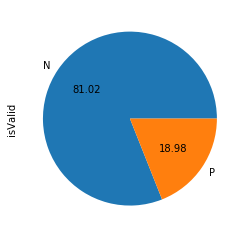

In [8]:
import matplotlib.pyplot as plt

df["isValid"].value_counts().plot.pie(autopct='%.2f',figsize=(4, 4))
plt.show()

In [9]:
df["isValid"].value_counts()

N    4231
P     991
Name: isValid, dtype: int64

In [10]:
df.to_json("AIMedFull_Ylhsieh.json")

## Split into train/test/validation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


train_p, val_p = train_test_split(df,  test_size=.1,
                                                        random_state=777, stratify=df["isValid"])

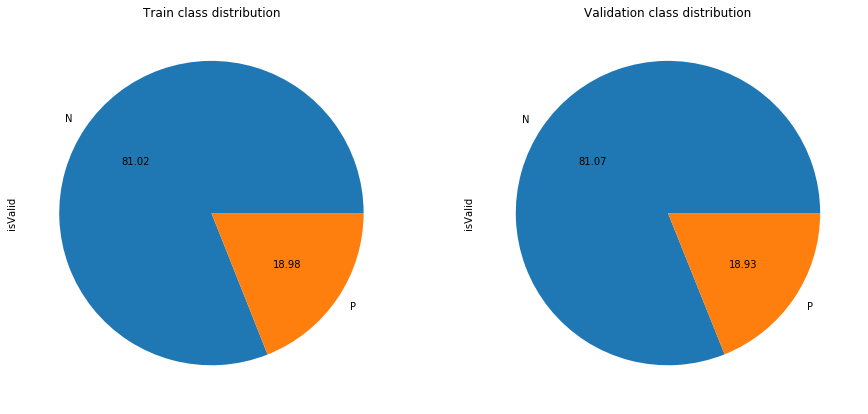

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val_p.isValid.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [13]:
train_p.to_json("AIMedtrain_pubmedoverlap_Ylhsieh.json")
val_p.to_json("AIMedval_pubmedoverlap_Ylhsieh.json")

In [14]:
train_p.sample(n=100).to_json("AIMedtrain_sample_Ylhsieh.json")